I referenced alpop's code: https://github.com/alpop/Fish

This code runs from the 'Kaggle_Fisheries' directory. It assumes all JPG and JSON files are present under the 'train/' sub-folder.

In [1]:
from PIL import Image
import os
import json

size = [1280, 720]  # All input images would be resized accordingly
val_ratio = 0.25    # how many images would be reserved for validation

In [2]:
species = ['ALB','BET','DOL','LAG','NoF', 'OTHER','SHARK','YFT']
work_dir = './'

if not os.path.exists(work_dir + 'train_1280x720/'):
        os.makedirs(work_dir + 'train_1280x720/')

In [3]:
box_widths  = []  # widths of the boudning boxes after resizing
box_heights = []  # heights of the boudning boxes after resizing

for spec in species:
    print('*** ' + spec + ' ***')
    input_dir  = work_dir + 'train/' + spec + '/'
    output_dir = work_dir + 'train_1280x720/' + spec + '/'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    json_file  = spec +  '_labels.json'
    
    # Read json
    with open(input_dir+json_file) as json_data:
        d = json.load(json_data)

    for i in range(len(d)):
        # Resize image
        fn =  str(d[i]['filename'])    
        im = Image.open(os.path.join(input_dir,fn))
        print('{}: {}x{}'.format(fn,im.size[0],im.size[1]))
        # Pick the side which needs to be scaled down the most
        scale = min(float(size[0])/im.size[0],float(size[1])/im.size[1])
        im = im.resize((int(im.size[0]*scale),int(im.size[1]*scale)),
                       Image.ANTIALIAS)
        # Padding on either right or bottom if necessary
        im = im.crop((0,0,size[0],size[1]))
        resized_path = output_dir + fn
        # Save the resized image
        im.save(resized_path)
        
        # Modify bounding boxes to match image scaling
        for j in range(len(d[i]['annotations'])):
            x = d[i]['annotations'][j]['x'] * scale
            y = d[i]['annotations'][j]['y'] * scale
            w = d[i]['annotations'][j]['width'] * scale
            h = d[i]['annotations'][j]['height'] * scale
            # Fix to avoid x, y, w, h out of bound
            if x < 0:
                w += x
                if w < 0: w = 20  # this should not happen
                x = 0
            if y < 0:
                h += y
                if h < 0: h = 20  # this should not happen
                y = 0
            if x+w > size[0]:
                w = size[0] - x
            if y+h > size[1]:
                h = size[1] - y
            d[i]['annotations'][j]['x'] = x
            d[i]['annotations'][j]['y'] = y
            d[i]['annotations'][j]['width'] = w 
            d[i]['annotations'][j]['height'] = h
            box_widths.append(w)
            box_heights.append(h)
    
    # Save the updated JSON file
    with open(output_dir + spec + '_1280x720_labels.json', 'w') as fp:
       json.dump(d, fp, indent=0)

*** ALB ***
img_07917.jpg: 1280x720
img_07915.jpg: 1280x720
img_07914.jpg: 1280x750
img_07912.jpg: 1280x750
img_07904.jpg: 1280x720
img_07903.jpg: 1280x720
img_07892.jpg: 1280x720
img_07890.jpg: 1280x720
img_07885.jpg: 1280x750
img_07883.jpg: 1280x720
img_07879.jpg: 1280x720
img_07878.jpg: 1280x974
img_07877.jpg: 1280x720
img_07876.jpg: 1280x720
img_07874.jpg: 1280x720
img_07871.jpg: 1280x720
img_07869.jpg: 1276x718
img_07868.jpg: 1280x720
img_07863.jpg: 1280x720
img_07862.jpg: 1280x720
img_07858.jpg: 1280x720
img_07851.jpg: 1192x670
img_07850.jpg: 1280x720
img_07836.jpg: 1280x750
img_07826.jpg: 1280x750
img_07822.jpg: 1280x750
img_07814.jpg: 1280x720
img_07811.jpg: 1280x720
img_07810.jpg: 1280x720
img_07807.jpg: 1280x720
img_07802.jpg: 1280x720
img_07801.jpg: 1280x720
img_07797.jpg: 1280x720
img_07794.jpg: 1280x720
img_07789.jpg: 1280x750
img_07785.jpg: 1244x700
img_07773.jpg: 1280x750
img_07772.jpg: 1192x670
img_07771.jpg: 1280x720
img_07768.jpg: 1276x718
img_07767.jpg: 1280x720
img_

img_06539.jpg: 1192x670
img_06527.jpg: 1192x670
img_06518.jpg: 1280x750
img_06514.jpg: 1280x720
img_06512.jpg: 1192x670
img_06503.jpg: 1280x720
img_06497.jpg: 1280x720
img_06492.jpg: 1192x670
img_06479.jpg: 1280x720
img_06471.jpg: 1280x720
img_06462.jpg: 1280x720
img_06461.jpg: 1280x720
img_06460.jpg: 1280x750
img_06458.jpg: 1276x718
img_06450.jpg: 1280x720
img_06445.jpg: 1280x720
img_06443.jpg: 1280x750
img_06439.jpg: 1280x750
img_06437.jpg: 1280x720
img_06435.jpg: 1280x720
img_06422.jpg: 1280x750
img_06421.jpg: 1280x750
img_06420.jpg: 1280x720
img_06405.jpg: 1280x720
img_06396.jpg: 1280x720
img_06393.jpg: 1280x720
img_06390.jpg: 1280x720
img_06388.jpg: 1280x720
img_06386.jpg: 1280x720
img_06383.jpg: 1280x720
img_06381.jpg: 1280x750
img_06380.jpg: 1280x720
img_06377.jpg: 1280x720
img_06376.jpg: 1280x720
img_06372.jpg: 1192x670
img_06367.jpg: 1280x720
img_06360.jpg: 1280x720
img_06350.jpg: 1280x720
img_06347.jpg: 1280x750
img_06344.jpg: 1192x670
img_06340.jpg: 1192x670
img_06338.jpg: 1

img_04852.jpg: 1280x750
img_04848.jpg: 1192x670
img_04841.jpg: 1280x750
img_04836.jpg: 1280x720
img_04827.jpg: 1280x720
img_04823.jpg: 1280x720
img_04822.jpg: 1280x720
img_04821.jpg: 1280x720
img_04808.jpg: 1280x720
img_04806.jpg: 1280x750
img_04798.jpg: 1280x750
img_04796.jpg: 1280x720
img_04792.jpg: 1192x670
img_04786.jpg: 1276x718
img_04783.jpg: 1280x750
img_04780.jpg: 1280x720
img_04778.jpg: 1280x720
img_04774.jpg: 1280x720
img_04771.jpg: 1280x750
img_04762.jpg: 1280x720
img_04755.jpg: 1276x718
img_04742.jpg: 1192x670
img_04737.jpg: 1280x720
img_04736.jpg: 1280x720
img_04729.jpg: 1280x720
img_04728.jpg: 1280x720
img_04721.jpg: 1280x720
img_04714.jpg: 1280x720
img_04713.jpg: 1280x720
img_04708.jpg: 1280x720
img_04706.jpg: 1276x718
img_04692.jpg: 1280x720
img_04683.jpg: 1280x720
img_04666.jpg: 1280x720
img_04660.jpg: 1280x720
img_04659.jpg: 1280x720
img_04635.jpg: 1280x720
img_04633.jpg: 1280x720
img_04630.jpg: 1192x670
img_04612.jpg: 1280x720
img_04609.jpg: 1276x718
img_04598.jpg: 1

img_03153.jpg: 1280x924
img_03151.jpg: 1280x720
img_03150.jpg: 1280x720
img_03147.jpg: 1280x750
img_03146.jpg: 1280x750
img_03145.jpg: 1280x750
img_03143.jpg: 1192x670
img_03141.jpg: 1276x718
img_03125.jpg: 1280x750
img_03123.jpg: 1192x670
img_03119.jpg: 1280x720
img_03115.jpg: 1280x720
img_03112.jpg: 1280x720
img_03108.jpg: 1280x720
img_03107.jpg: 1280x720
img_03106.jpg: 1192x670
img_03099.jpg: 1276x718
img_03092.jpg: 1280x720
img_03090.jpg: 1280x720
img_03089.jpg: 1280x720
img_03067.jpg: 1280x720
img_03061.jpg: 1280x720
img_03050.jpg: 1280x720
img_03047.jpg: 1280x750
img_03041.jpg: 1280x974
img_03040.jpg: 1280x720
img_03039.jpg: 1280x720
img_03038.jpg: 1280x974
img_03037.jpg: 1280x974
img_03031.jpg: 1280x720
img_03021.jpg: 1280x720
img_03017.jpg: 1280x720
img_03016.jpg: 1280x720
img_03011.jpg: 1280x720
img_03005.jpg: 1280x750
img_03003.jpg: 1280x720
img_02996.jpg: 1280x974
img_02995.jpg: 1280x750
img_02994.jpg: 1280x720
img_02992.jpg: 1280x720
img_02978.jpg: 1280x720
img_02950.jpg: 1

img_01574.jpg: 1192x670
img_01570.jpg: 1280x720
img_01558.jpg: 1280x720
img_01556.jpg: 1280x720
img_01554.jpg: 1280x720
img_01547.jpg: 1280x720
img_01542.jpg: 1280x720
img_01540.jpg: 1280x750
img_01529.jpg: 1192x670
img_01520.jpg: 1280x750
img_01514.jpg: 1192x670
img_01509.jpg: 1280x974
img_01507.jpg: 1280x720
img_01506.jpg: 1280x720
img_01489.jpg: 1280x750
img_01485.jpg: 1280x720
img_01482.jpg: 1280x720
img_01480.jpg: 1280x720
img_01478.jpg: 1280x720
img_01466.jpg: 1276x718
img_01464.jpg: 1280x720
img_01460.jpg: 1280x750
img_01458.jpg: 1280x750
img_01455.jpg: 1280x720
img_01454.jpg: 1280x720
img_01448.jpg: 1280x720
img_01446.jpg: 1280x720
img_01445.jpg: 1280x720
img_01434.jpg: 1280x720
img_01433.jpg: 1276x718
img_01422.jpg: 1280x720
img_01417.jpg: 1280x720
img_01416.jpg: 1280x720
img_01409.jpg: 1280x720
img_01402.jpg: 1280x720
img_01401.jpg: 1280x720
img_01398.jpg: 1280x750
img_01396.jpg: 1280x720
img_01390.jpg: 1280x720
img_01374.jpg: 1280x720
img_01367.jpg: 1276x718
img_01364.jpg: 1

*** BET ***
img_07825.jpg: 1280x720
img_07804.jpg: 1280x720
img_07795.jpg: 1244x700
img_07734.jpg: 1280x720
img_07721.jpg: 1280x974
img_07620.jpg: 1280x974
img_07581.jpg: 1280x974
img_07579.jpg: 1280x720
img_07545.jpg: 1280x750
img_07519.jpg: 1280x720
img_07518.jpg: 1280x974
img_07440.jpg: 1280x720
img_07410.jpg: 1280x720
img_07378.jpg: 1280x974
img_07321.jpg: 1280x974
img_07311.jpg: 1280x720
img_07164.jpg: 1518x854
img_07059.jpg: 1192x670
img_07015.jpg: 1280x974
img_07007.jpg: 1280x720
img_06997.jpg: 1280x720
img_06983.jpg: 1280x720
img_06867.jpg: 1280x720
img_06862.jpg: 1280x974
img_06827.jpg: 1280x720
img_06825.jpg: 1518x854
img_06777.jpg: 1280x750
img_06776.jpg: 1280x974
img_06772.jpg: 1518x854
img_06636.jpg: 1280x720
img_06623.jpg: 1280x720
img_06613.jpg: 1244x700
img_06575.jpg: 1280x974
img_06542.jpg: 1280x974
img_06532.jpg: 1280x720
img_06453.jpg: 1280x720
img_06384.jpg: 1518x854
img_06287.jpg: 1280x720
img_06277.jpg: 1280x974
img_06035.jpg: 1280x720
img_05986.jpg: 1280x974
img_

img_04953.jpg: 1280x720
img_04741.jpg: 1280x720
img_04734.jpg: 1280x720
img_04711.jpg: 1280x720
img_04678.jpg: 1280x720
img_04481.jpg: 1280x720
img_04435.jpg: 1280x720
img_04414.jpg: 1280x720
img_04352.jpg: 1280x720
img_04297.jpg: 1280x720
img_04279.jpg: 1280x720
img_04199.jpg: 1280x720
img_03940.jpg: 1280x720
img_03774.jpg: 1280x720
img_03771.jpg: 1280x720
img_03611.jpg: 1280x720
img_03232.jpg: 1280x720
img_03052.jpg: 1280x720
img_02758.jpg: 1280x720
img_02728.jpg: 1280x720
img_02694.jpg: 1280x720
img_02608.jpg: 1280x720
img_02533.jpg: 1280x720
img_02415.jpg: 1280x720
img_02349.jpg: 1280x720
img_02236.jpg: 1280x720
img_02186.jpg: 1280x720
img_02089.jpg: 1280x720
img_02042.jpg: 1280x720
img_01952.jpg: 1280x720
img_01766.jpg: 1280x720
img_01644.jpg: 1280x720
img_01527.jpg: 1280x720
img_01512.jpg: 1280x720
img_01457.jpg: 1280x720
img_01221.jpg: 1280x720
img_01037.jpg: 1280x720
img_00784.jpg: 1280x720
img_00657.jpg: 1280x720
img_00176.jpg: 1280x720
img_00091.jpg: 1280x720
*** NoF ***
img_

img_04703.jpg: 1280x720
img_04770.jpg: 1280x720
img_04785.jpg: 1276x718
img_04793.jpg: 1280x720
img_04828.jpg: 1334x750
img_04840.jpg: 1280x720
img_04842.jpg: 1276x718
img_04847.jpg: 1192x670
img_04866.jpg: 1280x750
img_04886.jpg: 1276x718
img_04889.jpg: 1280x720
img_04906.jpg: 1276x718
img_04916.jpg: 1280x720
img_04941.jpg: 1280x750
img_04956.jpg: 1280x720
img_04971.jpg: 1276x718
img_05012.jpg: 1280x720
img_05050.jpg: 1276x718
img_05073.jpg: 1276x718
img_05115.jpg: 1280x750
img_05130.jpg: 1276x718
img_05178.jpg: 1192x670
img_05190.jpg: 1276x718
img_05254.jpg: 1280x720
img_05256.jpg: 1280x720
img_05319.jpg: 1280x720
img_05325.jpg: 1732x974
img_05352.jpg: 1280x720
img_05360.jpg: 1276x718
img_05398.jpg: 1276x718
img_05455.jpg: 1276x718
img_05456.jpg: 1732x974
img_05461.jpg: 1280x720
img_05466.jpg: 1280x720
img_05474.jpg: 1280x720
img_05503.jpg: 1280x720
img_05534.jpg: 1276x718
img_05535.jpg: 1280x720
img_05542.jpg: 1276x718
img_05594.jpg: 1334x750
img_05625.jpg: 1276x718
img_05636.jpg: 1

img_03265.jpg: 1280x750
img_03246.jpg: 1280x720
img_03243.jpg: 1280x720
img_03191.jpg: 1280x720
img_03163.jpg: 1280x720
img_03133.jpg: 1280x720
img_03132.jpg: 1280x720
img_03076.jpg: 1280x720
img_03070.jpg: 1280x720
img_03066.jpg: 1280x720
img_03049.jpg: 1280x720
img_03022.jpg: 1280x720
img_02959.jpg: 1280x720
img_02955.jpg: 1280x720
img_02942.jpg: 1280x720
img_02874.jpg: 1280x720
img_02831.jpg: 1280x720
img_02802.jpg: 1280x720
img_02792.jpg: 1280x720
img_02773.jpg: 1280x974
img_02760.jpg: 1280x720
img_02745.jpg: 1280x720
img_02715.jpg: 1280x720
img_02691.jpg: 1280x720
img_02680.jpg: 1280x974
img_02595.jpg: 1280x720
img_02543.jpg: 1280x720
img_02541.jpg: 1280x720
img_02528.jpg: 1280x720
img_02511.jpg: 1280x720
img_02419.jpg: 1280x720
img_02413.jpg: 1280x720
img_02407.jpg: 1280x720
img_02395.jpg: 1280x974
img_02377.jpg: 1280x720
img_02360.jpg: 1280x720
img_02353.jpg: 1280x720
img_02331.jpg: 1280x720
img_02202.jpg: 1280x720
img_02198.jpg: 1280x720
img_02177.jpg: 1280x720
img_02160.jpg: 1

img_07462.jpg: 1280x720
img_07431.jpg: 1280x974
img_07429.jpg: 1280x974
img_07427.jpg: 1280x720
img_07403.jpg: 1280x720
img_07400.jpg: 1280x720
img_07395.jpg: 1280x750
img_07388.jpg: 1280x974
img_07383.jpg: 1280x750
img_07369.jpg: 1280x750
img_07368.jpg: 1280x720
img_07344.jpg: 1280x974
img_07341.jpg: 1280x974
img_07340.jpg: 1280x750
img_07338.jpg: 1280x974
img_07315.jpg: 1280x720
img_07309.jpg: 1280x750
img_07290.jpg: 1280x750
img_07287.jpg: 1280x974
img_07286.jpg: 1280x720
img_07276.jpg: 1280x720
img_07275.jpg: 1280x720
img_07273.jpg: 1280x720
img_07261.jpg: 1280x974
img_07250.jpg: 1280x974
img_07233.jpg: 1280x974
img_07226.jpg: 1280x720
img_07217.jpg: 1280x720
img_07208.jpg: 1280x750
img_07166.jpg: 1276x718
img_07130.jpg: 1280x974
img_07119.jpg: 1280x750
img_07116.jpg: 1280x974
img_07109.jpg: 1280x750
img_07107.jpg: 1280x720
img_07095.jpg: 1280x720
img_07074.jpg: 1280x720
img_07072.jpg: 1280x720
img_07069.jpg: 1280x720
img_07067.jpg: 1280x720
img_07061.jpg: 1280x974
img_07055.jpg: 1

img_03596.jpg: 1280x974
img_03590.jpg: 1280x720
img_03585.jpg: 1280x750
img_03568.jpg: 1280x720
img_03567.jpg: 1280x974
img_03560.jpg: 1280x720
img_03558.jpg: 1280x720
img_03543.jpg: 1280x720
img_03541.jpg: 1280x974
img_03540.jpg: 1280x720
img_03514.jpg: 1280x750
img_03505.jpg: 1280x750
img_03485.jpg: 1280x750
img_03480.jpg: 1280x720
img_03477.jpg: 1280x720
img_03464.jpg: 1280x974
img_03460.jpg: 1280x750
img_03437.jpg: 1280x720
img_03430.jpg: 1280x720
img_03407.jpg: 1280x720
img_03400.jpg: 1280x720
img_03396.jpg: 1280x720
img_03388.jpg: 1280x750
img_03372.jpg: 1280x974
img_03367.jpg: 1280x720
img_03340.jpg: 1280x974
img_03327.jpg: 1280x720
img_03325.jpg: 1280x720
img_03313.jpg: 1280x720
img_03301.jpg: 1280x974
img_03278.jpg: 1280x720
img_03276.jpg: 1280x974
img_03266.jpg: 1280x720
img_03253.jpg: 1280x720
img_03244.jpg: 1280x720
img_03242.jpg: 1280x974
img_03217.jpg: 1280x720
img_03211.jpg: 1280x720
img_03198.jpg: 1280x974
img_03196.jpg: 1280x974
img_03189.jpg: 1280x974
img_03185.jpg: 1

Again, we can check/verify fish annotations with [sloth labeling tool](https://github.com/cvhciKIT/sloth), by executing the following shell command.

```shell
$ sloth train/ALB/ALB_labels.json
$ sloth train/BET/BET_labels.json
......
```

*** after resizing ***
min/max bounding box widths  = 813.7 / 29.6
min/max bounding box heights = 494.9 / 32.0


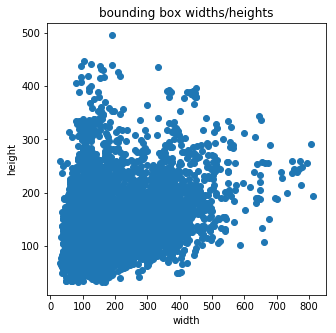

In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

print('*** after resizing ***')
print('min/max bounding box widths  = {0:4.1f} / {1:4.1f}'.format(
    max(box_widths),min(box_widths)))
print('min/max bounding box heights = {0:4.1f} / {1:4.1f}'.format(
    max(box_heights),min(box_heights)))

plt.figure(figsize=(5, 5))

plt.subplot(1, 1, 1)
plt.scatter(np.array(box_widths),np.array(box_heights))
plt.title('bounding box widths/heights')
plt.xlabel('width')
plt.ylabel('height')

plt.show()

In [5]:
import random
import shutil

if os.path.exists(work_dir + 'for_detectnet/'):
    shutil.rmtree(work_dir + 'for_detectnet/')
os.makedirs(work_dir + 'for_detectnet/train/images/')
os.makedirs(work_dir + 'for_detectnet/train/labels/')
os.makedirs(work_dir + 'for_detectnet/val/images/')
os.makedirs(work_dir + 'for_detectnet/val/labels/')

According to NVIDIA DIGITS documentation, DetectNet label txt files are formatted as follows.

https://github.com/NVIDIA/DIGITS/tree/master/digits/extensions/data/objectDetection

The label files contain the following information, which can be read and written using the matlab tools (readLabels.m, writeLabels.m) provided within this devkit. All values (numerical or strings) are separated via spaces, each row corresponds to one object. The 15 columns represent:

```
#Values    Name      Description
----------------------------------------------------------------------------
   1    type         Describes the type of object: 'Car', 'Van', 'Truck',
                     'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram',
                     'Misc' or 'DontCare'
   1    truncated    Float from 0 (non-truncated) to 1 (truncated), where
                     truncated refers to the object leaving image boundaries
   1    occluded     Integer (0,1,2,3) indicating occlusion state:
                     0 = fully visible, 1 = partly occluded
                     2 = largely occluded, 3 = unknown
   1    alpha        Observation angle of object, ranging [-pi..pi]
   4    bbox         2D bounding box of object in the image (0-based index):
                     contains left, top, right, bottom pixel coordinates
   3    dimensions   3D object dimensions: height, width, length (in meters)
   3    location     3D object location x,y,z in camera coordinates (in meters)
   1    rotation_y   Rotation ry around Y-axis in camera coordinates [-pi..pi]
   1    score        Only for results: Float, indicating confidence in
                     detection, needed for p/r curves, higher is better.

Here, 'DontCare' labels denote regions in which objects have not been labeled, for example because they have been too far away from the laser scanner. To prevent such objects from being counted as false positives our evaluation script will ignore objects detected in don't care regions of the test set. You can use the don't care labels in the training set to avoid that your object detector is harvesting hard negatives from those areas, in case you consider non-object regions from the training images as negative examples.

......
```

In [6]:
for spec in species:
    print('*** ' + spec + ' ***')
    input_dir  = work_dir + 'train_1280x720/' + spec + '/'
    json_file  = spec +  '_1280x720_labels.json'
    
    # Read json
    with open(input_dir + json_file) as json_data:
        d = json.load(json_data)
    for i in range(len(d)):
        output_dir = work_dir + 'for_detectnet/train/'
        if spec != 'NoF':
            if random.random() < val_ratio:
                output_dir = work_dir + 'for_detectnet/val/'
        # Copy the image over
        fn =  str(d[i]['filename'])
        shutil.copy(input_dir + fn, output_dir + 'images/')
        fnbase, ext = os.path.splitext(fn)
        # One Label file per one image
        with open(output_dir + 'labels/' + fnbase + '.txt', 'w') as fp:
            # Convert annotations to required format
            for j in range(len(d[i]['annotations'])):
                l = d[i]['annotations'][j]['x']
                t = d[i]['annotations'][j]['y']
                r = l + d[i]['annotations'][j]['width']
                b = t + d[i]['annotations'][j]['height']
                
                if spec != 'NoF':
                    type = 'Car'
                    truncated = 0
                    occluded  = 3
                    alpha  = 0
                    tail = '0 0 0 0 0 0 0 0'
                else:
                    type = 'DontCare'
                    truncated = -1
                    occluded  = -1
                    alpha = -10
                    tail = '-1 -1 -1 -1000 -1000 -1000 -10'
                
                label = type + ' ' +            \
                        str(truncated) + ' ' +  \
                        str(occluded)  + ' ' +  \
                        str(alpha)     + ' ' +  \
                        str(l) + ' ' + str(t) + ' ' + str(r) + ' ' + str(b) + ' ' + tail
                fp.write(label + '\n')

*** ALB ***
*** BET ***
*** DOL ***
*** LAG ***
*** NoF ***
*** OTHER ***
*** SHARK ***
*** YFT ***


Done. We now should have data ready for DetectNet training, organized as follows.

```
for_detectnet/train/
              ├── images/
              │   └── img_00001.jpg
              └── labels/
                  └── img_00001.txt
for_detectnet/val/
              ├── images/
              │   └── img_00002.jpg
              └── labels/
                  └── img_00002.txt
```